<a href="https://colab.research.google.com/github/7PAM2015-0509-2023-Group17/Kaggle-Challenge/blob/main/Kaggle_Challenge_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from google.colab import files
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from sklearn.inspection import PartialDependenceDisplay

In [ ]:
# URL to the CSV file on GitHub
train_url = 'https://raw.githubusercontent.com/7PAM2015-0509-2023-Group17/Kaggle-Challenge/main/train.csv'

# Reading the CSV file into pandas DataFrames
train = pd.read_csv(train_url)

# Display the first few rows of the DataFrames to ensure they are loaded correctly
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
# URL to the CSV file on GitHub
test_url = 'https://raw.githubusercontent.com/7PAM2015-0509-2023-Group17/Kaggle-Challenge/main/test.csv'

# Reading the CSV file into pandas DataFrames
test = pd.read_csv(test_url)

# Display the first few rows of the DataFrames to ensure they are loaded correctly
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [ ]:
# Check unique values in CryoSleep and VIP columns
print("\nUnique values in CryoSleep column:")
print(train['CryoSleep'].unique())

print("\nUnique values in VIP column:")
print(train['VIP'].unique())

# Convert CryoSleep and VIP columns to boolean type
train['CryoSleep'] = train['CryoSleep'].astype(bool)
train['VIP'] = train['VIP'].astype(bool)


Unique values in CryoSleep column:
[False True nan]

Unique values in VIP column:
[False True nan]


In [ ]:
# Display the columns and their data types after conversion
print("\nColumns and Data Types after conversion:")
print(train.info())
print("\nColumns and Data Types after conversion:")
print(test.info())
# Summarize the boolean columns
boolean_columns = ['CryoSleep', 'VIP', 'Transported']
for col in boolean_columns:
    print(f"\nSummary of {col}:")
    print(train[col].value_counts(dropna=False))


Columns and Data Types after conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8693 non-null   bool   
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8693 non-null   bool   
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(3), float64(6), object(5)
memory usage: 772.6+ KB
None

Columns and Data Types after conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427

<Axes: title={'center': 'VIP'}, xlabel='VIP'>

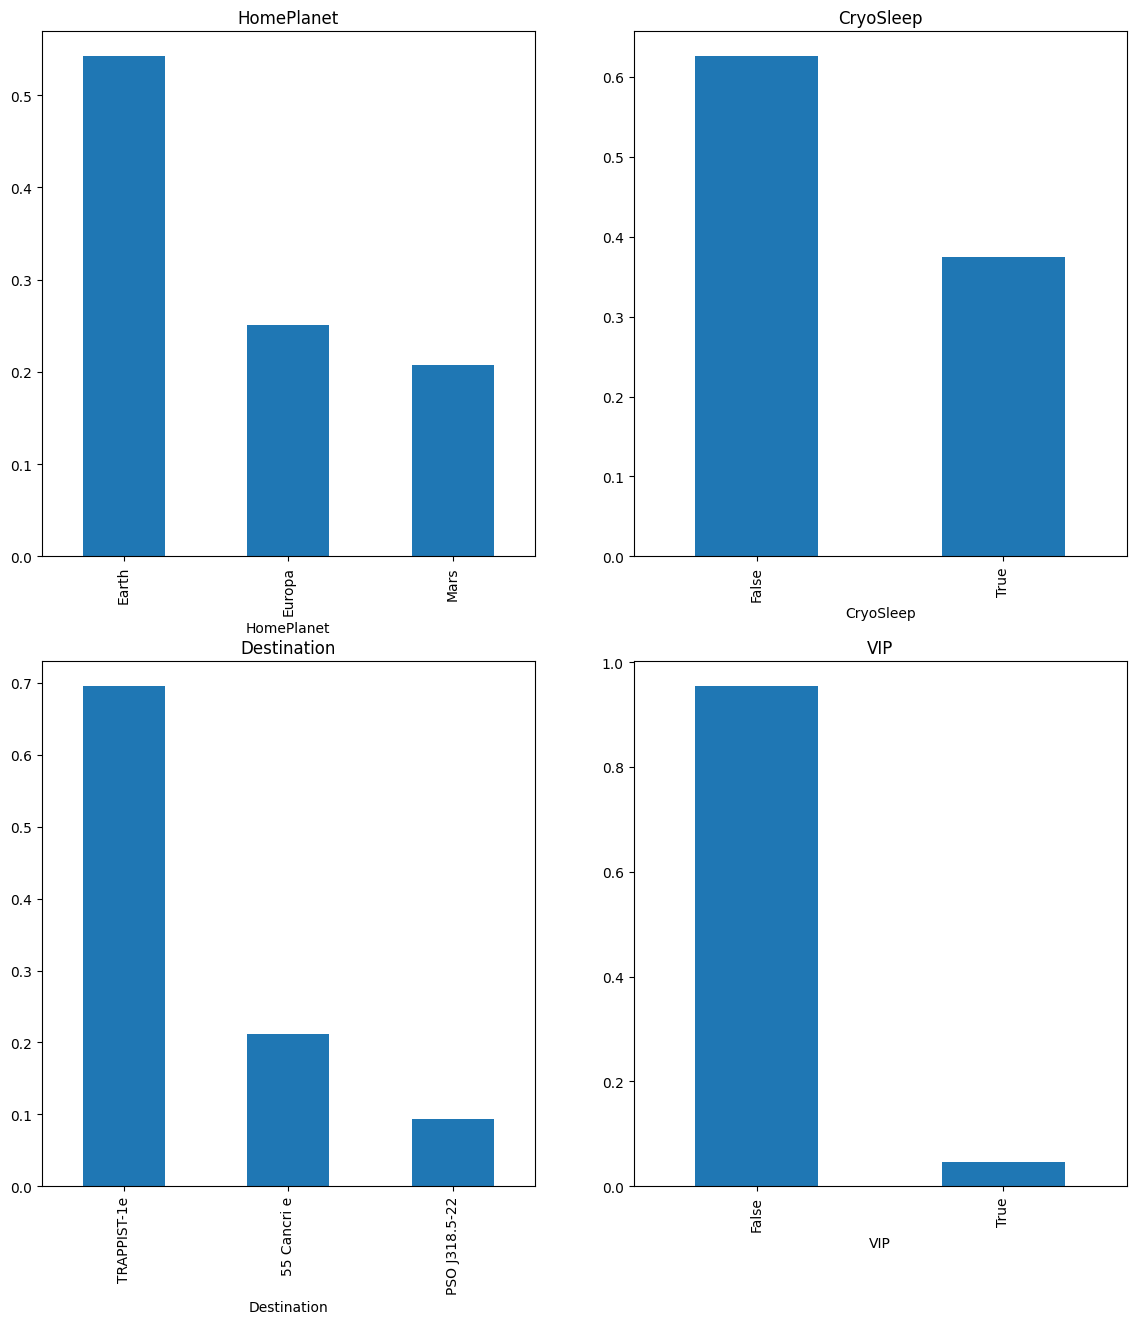

In [ ]:
# Visualize independent categorical features
plt.figure(figsize = (14, 15))
plt.subplot(2,2,1)
train['HomePlanet'].value_counts(normalize = True).plot.bar(title = 'HomePlanet')
plt.subplot(2,2,2)
train['CryoSleep'].value_counts(normalize = True).plot.bar(title = 'CryoSleep')
plt.subplot(2,2,3)
train['Destination'].value_counts(normalize = True).plot.bar(title = 'Destination')
plt.subplot(2,2,4)
train['VIP'].value_counts(normalize = True).plot.bar(title = 'VIP')

In [ ]:
# Feature engineering: Split Cabin column into Deck, Number, and Side
train[['Deck', 'CabinNum', 'Side']] = train['Cabin'].str.split('/', expand=True)
test[['Deck', 'CabinNum', 'Side']] = test['Cabin'].str.split('/', expand=True)
# Drop the original Cabin column
train.drop(columns=['Cabin'], inplace=True)
test.drop(columns=['Cabin'], inplace=True)

<Axes: title={'center': 'CabinSide'}, xlabel='Side'>

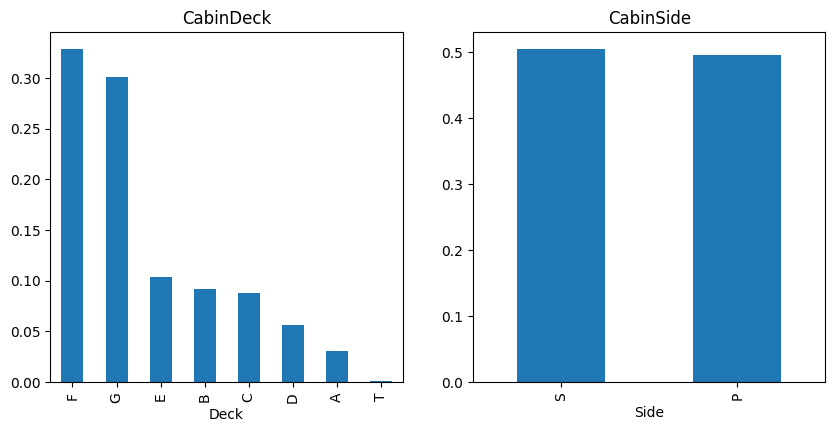

In [ ]:
# Visualize cabin features
plt.figure(figsize = (10, 10))
plt.subplot(2,2,1)
train['Deck'].value_counts(normalize = True).plot.bar(title = 'CabinDeck')
plt.subplot(2,2,2)
train['Side'].value_counts(normalize = True).plot.bar(title = 'CabinSide')

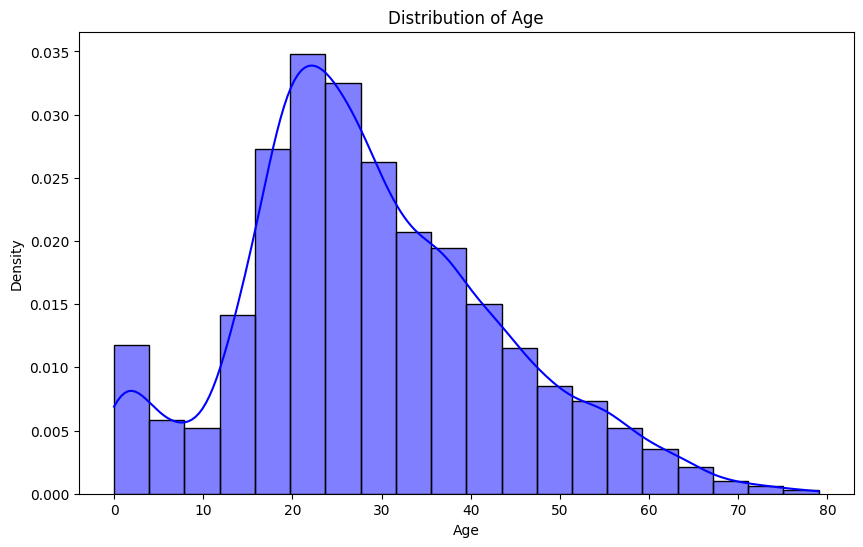

In [ ]:
# Distribution of Age
plt.figure(figsize=(10, 6))
# Plotting the histogram with seaborn
sns.histplot(train['Age'], bins=20, kde=True, color='blue', stat='density')
# Adding title and labels
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Density')

# Display the plot
plt.show()

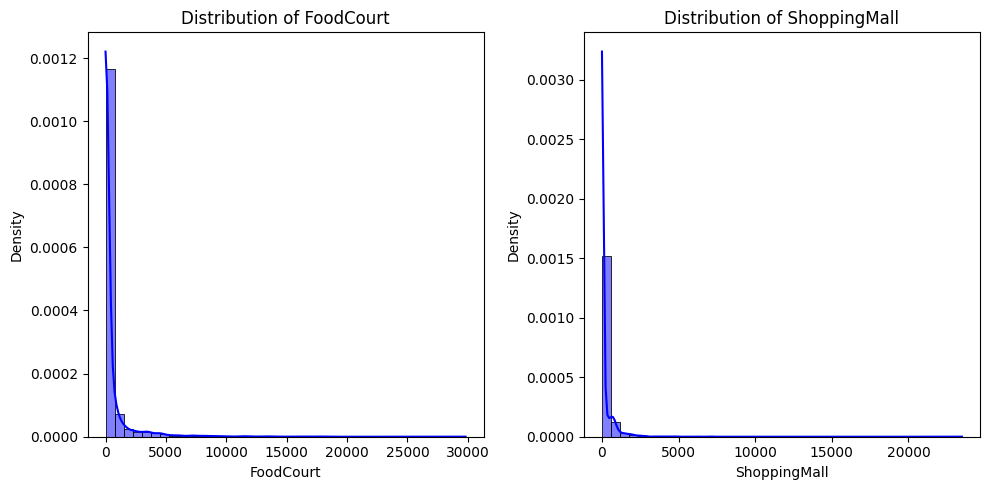

In [ ]:
plt.figure(figsize = (10, 5))
# Plotting the histogram for FoodCourt
plt.subplot(1, 2, 1)
sns.histplot(train['FoodCourt'], bins=40, kde=True, color='blue', stat='density')
plt.title('Distribution of FoodCourt')
plt.xlabel('FoodCourt')
plt.ylabel('Density')

# Plotting the histogram for ShoppingMall
plt.subplot(1, 2, 2)
sns.histplot(train['ShoppingMall'], bins=40, kde=True, color='blue', stat='density')
plt.title('Distribution of ShoppingMall')
plt.xlabel('ShoppingMall')
plt.ylabel('Density')

# Adjust layout and display plots
plt.tight_layout()
plt.show()

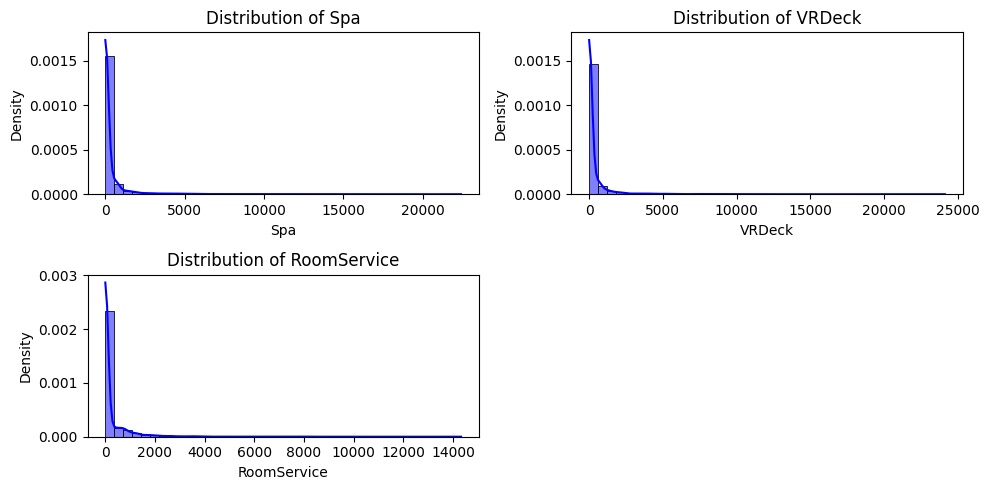

In [ ]:
plt.figure(figsize = (10, 5))
# Plotting the histogram for FoodCourt
plt.subplot(2, 2, 1)
sns.histplot(train['Spa'], bins=40, kde=True, color='blue', stat='density')
plt.title('Distribution of Spa')

# Plotting the histogram for VRDeck
plt.subplot(2, 2, 2)
sns.histplot(train['VRDeck'], bins=40, kde=True, color='blue', stat='density')
plt.title('Distribution of VRDeck')

# Plotting the histogram for RoomService
plt.subplot(2, 2, 3)
sns.histplot(train['RoomService'], bins=40, kde=True, color='blue', stat='density')
plt.title('Distribution of RoomService')

# Adjust layout and display plots
plt.tight_layout()
plt.show()

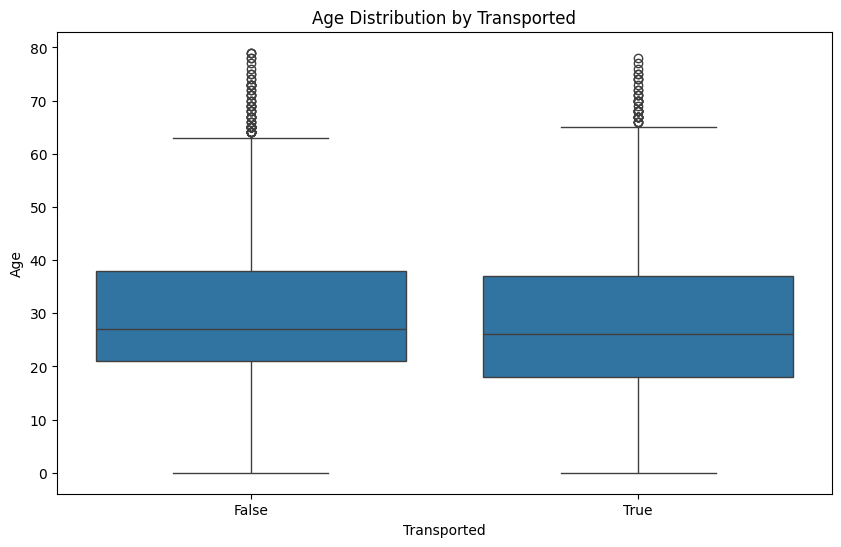

In [ ]:
# Relationship Between Age and Transported
plt.figure(figsize=(10, 6))
sns.boxplot(x='Transported', y='Age', data=train)
plt.title('Age Distribution by Transported')
plt.xlabel('Transported')
plt.ylabel('Age')
plt.show()


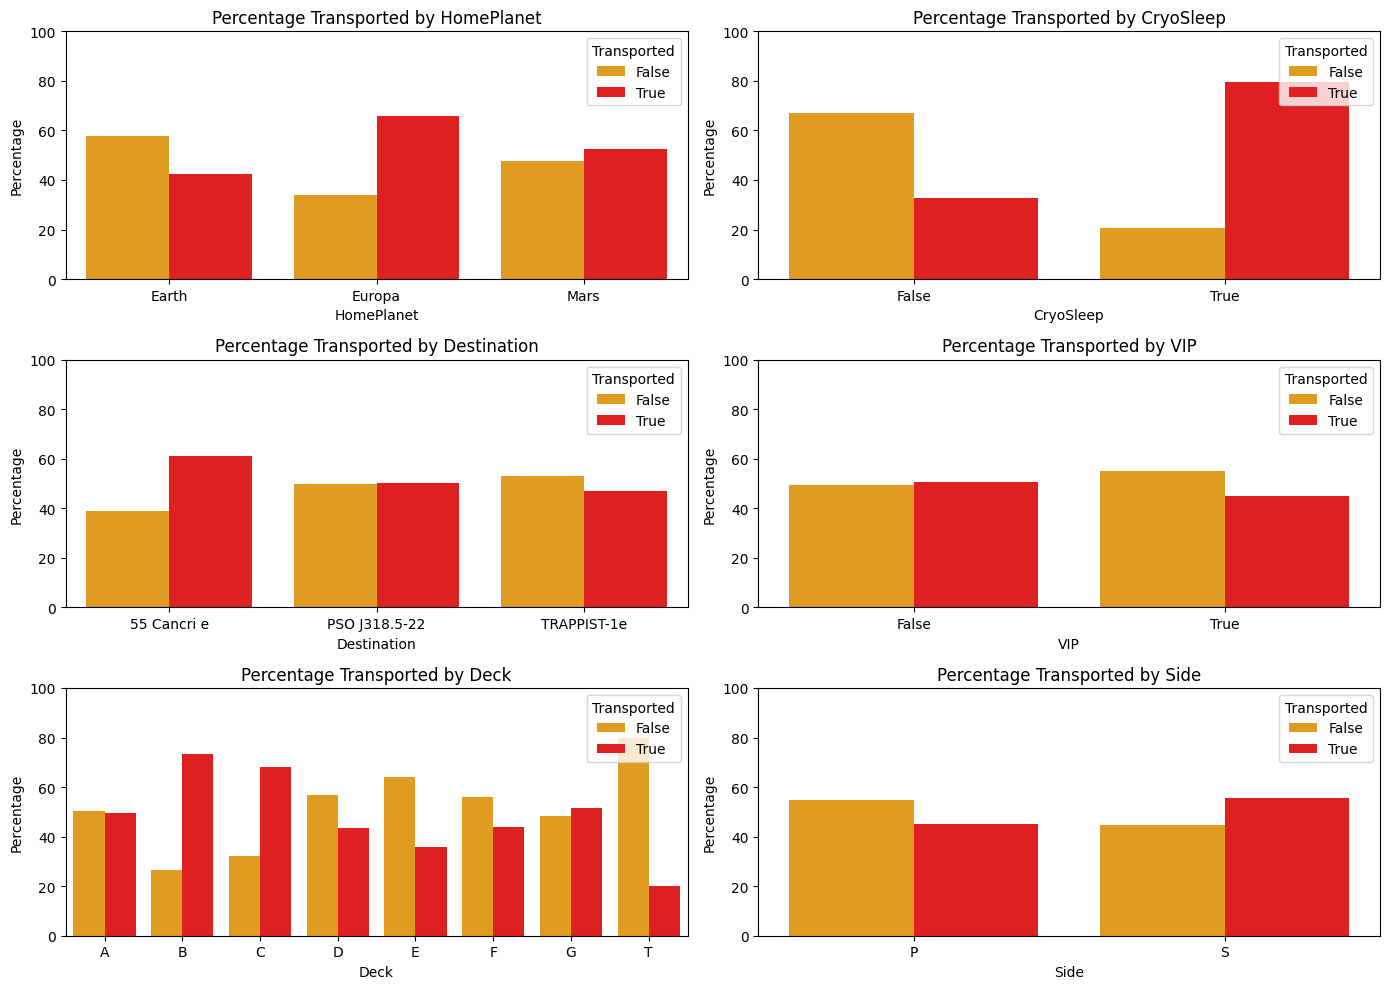

In [ ]:
# List of categorical features to visualize
categorical_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side']

# Define custom color palette for 'Transported' and 'Not Transported'
colors = {True: 'red', False: 'orange'}

# Set up the figure size
plt.figure(figsize=(14, 10))

# Loop over each categorical feature
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 2, i)

    # Calculate percentage of people transported in each category
    prop_df = train.groupby(feature)['Transported'].value_counts(normalize=True).mul(100).rename('percent').reset_index()

    # Customize colors using the defined palette
    sns.barplot(x=feature, y='percent', hue='Transported', data=prop_df, palette=colors)

    plt.title(f'Percentage Transported by {feature}')
    plt.ylabel('Percentage')
    plt.ylim(0, 100)

    plt.legend(title='Transported', loc='upper right')  # Use default labels

plt.tight_layout()
plt.show()



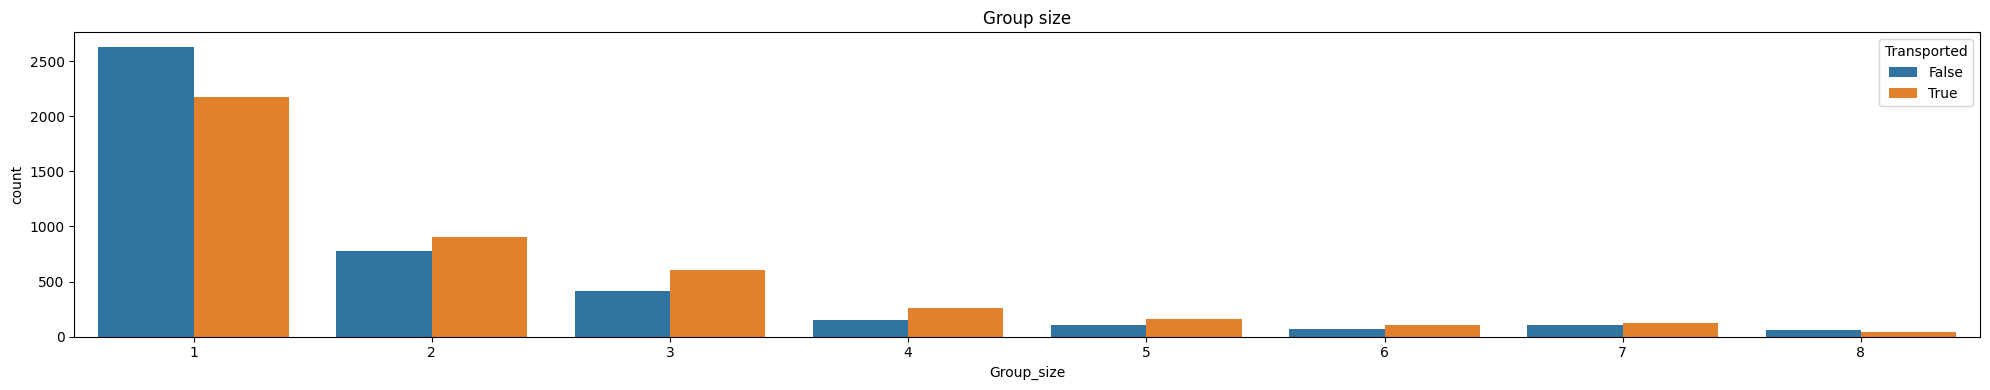

In [ ]:
# New feature - Group
train['Group'] = train['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)
test['Group'] = test['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)

# New feature - Group size
train['Group_size']=train['Group'].map(lambda x: pd.concat([train['Group'], test['Group']]).value_counts()[x])
test['Group_size']=test['Group'].map(lambda x: pd.concat([train['Group'], test['Group']]).value_counts()[x])

# Plot distribution of new features
plt.figure(figsize=(20,4))
sns.countplot(data=train, x='Group_size', hue='Transported')
plt.title('Group size')
plt.tight_layout()

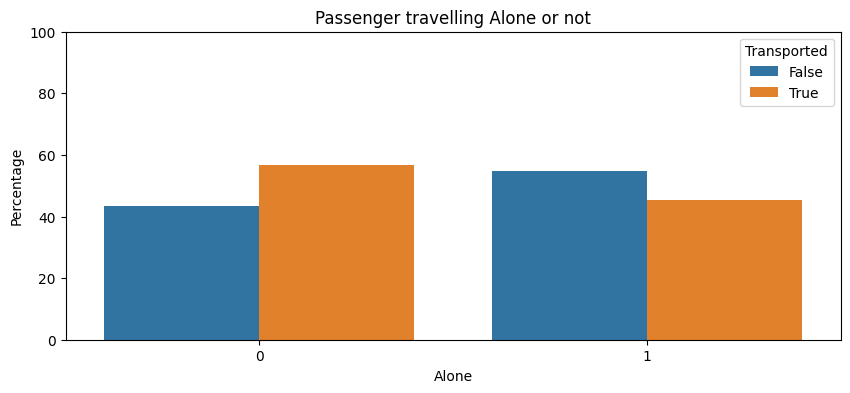

In [ ]:
# Create the 'alone' feature
train['Alone'] = (train['Group_size'] == 1).astype(int)
test['Alone'] = (test['Group_size'] == 1).astype(int)

# Calculate the percentages
alone_counts = train.groupby(['Alone', 'Transported']).size().unstack()
alone_percentages = alone_counts.div(alone_counts.sum(axis=1), axis=0) * 100

# Plot the percentages
plt.figure(figsize=(10, 4))
sns.barplot(data=alone_percentages.reset_index().melt(id_vars='Alone'), x='Alone', y='value', hue='Transported')
plt.title('Passenger travelling Alone or not')
plt.ylabel('Percentage')
plt.ylim([0, 100])
plt.show()

In [ ]:
#Create new feature TotalSpend
Services=['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
train['TotalSpend']=train[Services].sum(axis=1)
test['TotalSpend']=test[Services].sum(axis=1)

In [ ]:
numerical_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
# Initialize the SimpleImputer with strategy as 'mean'
imputer = SimpleImputer(strategy='mean')

# Fit and transform the numerical columns
train[numerical_features] = imputer.fit_transform(train[numerical_features])
test[numerical_features] = imputer.transform(test[numerical_features])
# Display missing values after imputation to verify
print("\nMissing values after imputation:")
print(train[numerical_features].isnull().sum())
print("\nMissing values after imputation for test dataset:")
print(test[numerical_features].isnull().sum())


Missing values after imputation:
Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

Missing values after imputation for test dataset:
Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64


In [ ]:
# Impute missing values in categorial features except deck,side and  with most_frequent
imputer = SimpleImputer(strategy='most_frequent')
train[categorical_features] = imputer.fit_transform(train[categorical_features])
test[categorical_features] = imputer.fit_transform(test[categorical_features])
# Display missing values after imputation to verify
print("\nMissing values after imputation:")
print(train[categorical_features].isnull().sum())
print("\nMissing values after imputation for test dataset:")
print(test[categorical_features].isnull().sum())



Missing values after imputation:
HomePlanet     0
CryoSleep      0
Destination    0
VIP            0
Deck           0
Side           0
dtype: int64

Missing values after imputation for test dataset:
HomePlanet     0
CryoSleep      0
Destination    0
VIP            0
Deck           0
Side           0
dtype: int64


In [ ]:
#imputing Deck, CabinNum, Side
# List of columns to impute
columns_to_impute = ['Deck', 'CabinNum', 'Side']

# Initialize SimpleImputer with strategy as 'most_frequent'
imputer = SimpleImputer(strategy='most_frequent')

# Fit and transform the columns in the training set
train[columns_to_impute] = imputer.fit_transform(train[columns_to_impute])

# Transform the columns in the test set
test[columns_to_impute] = imputer.transform(test[columns_to_impute])

In [ ]:
train.drop(columns=['Name'], inplace=True)
test.drop(columns=['Name'], inplace=True)

In [ ]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,CabinNum,Side,Group,Group_size,Alone,TotalSpend
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P,1,1,1,0.0
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S,2,1,1,736.0
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S,3,2,0,10383.0
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S,3,2,0,5176.0
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S,4,1,1,1091.0


In [ ]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,CabinNum,Side,Group,Group_size,Alone,TotalSpend
0,0013_01,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,G,3,S,13,1,1,0.0
1,0018_01,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,F,4,S,18,1,1,2832.0
2,0019_01,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,C,0,S,19,1,1,0.0
3,0021_01,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,C,1,S,21,1,1,7418.0
4,0023_01,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,F,5,S,23,1,1,645.0


In [ ]:
# Function to cap outliers based on IQR
def cap_outliers(df, column, multiplier=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    df[column] = df[column].clip(lower_bound, upper_bound)
    return df

# Example usage on 'train' DataFrame
train = cap_outliers(train, 'TotalSpend')

# Example usage on 'test' DataFrame
test = cap_outliers(test, 'TotalSpend')



In [ ]:
# Perform one-hot encoding on categorical features
train_encoded = pd.get_dummies(train, columns=categorical_features, drop_first=True)
test_encoded = pd.get_dummies(test, columns=categorical_features, drop_first=True)

# Align train and test datasets (in case of different categories)
train_encoded, test_encoded = train_encoded.align(test_encoded, join='left', axis=1, fill_value=0)

# Display the first few rows of the transformed datasets
print("\nTransformed training data:")
print(train_encoded.head())
print("\nTransformed test data:")
print(test_encoded.head())


Transformed training data:
  PassengerId   Age  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  \
0     0001_01  39.0          0.0        0.0           0.0     0.0     0.0   
1     0002_01  24.0        109.0        9.0          25.0   549.0    44.0   
2     0003_01  58.0         43.0     3576.0           0.0  6715.0    49.0   
3     0003_02  33.0          0.0     1283.0         371.0  3329.0   193.0   
4     0004_01  16.0        303.0       70.0         151.0   565.0     2.0   

   Transported CabinNum  Group  ...  Destination_TRAPPIST-1e  VIP_True  \
0        False        0      1  ...                     True     False   
1         True        0      2  ...                     True     False   
2        False        0      3  ...                     True      True   
3        False        0      3  ...                     True     False   
4         True        1      4  ...                     True     False   

   Deck_B  Deck_C  Deck_D  Deck_E  Deck_F  Deck_G  Deck_T  Side_

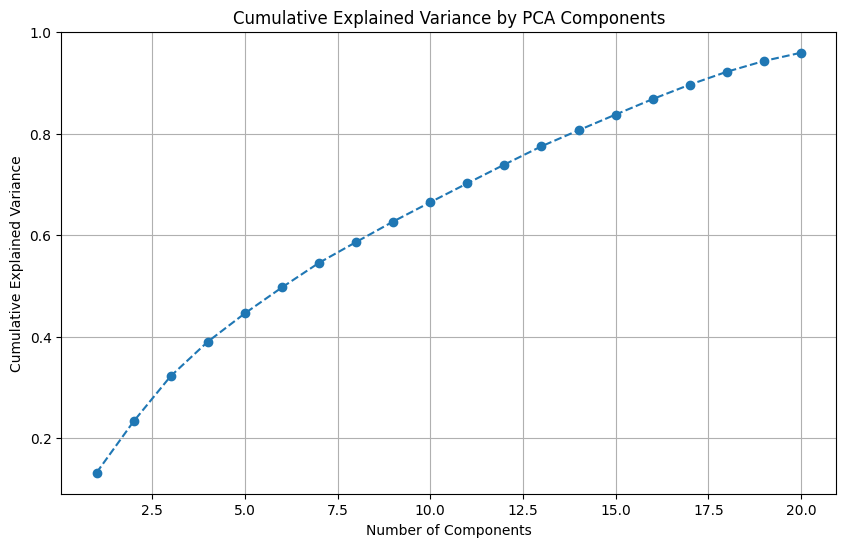


Transformed training data with PCA:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  2.123184 -1.297457 -1.849599  0.740335 -1.402831 -0.491038 -1.129777   
1  0.174499 -0.049223 -2.803185  0.435495 -0.657442  0.753980 -1.608405   
2  5.594796  0.886164 -0.622945  0.940486  0.979277  0.262604 -0.518744   
3  3.726279  0.163800 -1.369226  0.255585  1.271134 -0.145479 -1.054899   
4  0.221969  0.107471 -2.817116  0.349064 -0.377615  0.786034 -1.527238   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0  0.780595 -2.416388 -0.252134 -1.428221  0.680137 -0.095513 -0.284796   
1 -0.308776  0.131553  0.713657  0.672733 -0.694656 -0.043975  0.136309   
2 -0.580195 -1.020860 -1.033300  0.873930 -2.609888  3.177902 -4.102057   
3  0.043785 -0.454683  0.446884  0.710725 -0.323605 -0.762063 -1.401258   
4 -0.338164  0.147832  0.970047  0.662868 -0.685902  0.004585  0.191899   

       PC15      PC16      PC17      PC18      PC19      PC20

In [ ]:
# Combine train and test datasets to ensure the same PCA transformation
combined_data = pd.concat([train_encoded, test_encoded], axis=0)

# Standardize the data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(combined_data)

# Fit PCA
pca = PCA(n_components=0.95)  # Keep 95% of the variance
pca.fit(standardized_data)

# Visualize explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Transform the data using the PCA model
train_pca = pca.transform(scaler.transform(train_encoded))
test_pca = pca.transform(scaler.transform(test_encoded))

# Convert the transformed data back to DataFrame for easier handling
train_pca_df = pd.DataFrame(train_pca, columns=[f'PC{i}' for i in range(1, train_pca.shape[1] + 1)])
test_pca_df = pd.DataFrame(test_pca, columns=[f'PC{i}' for i in range(1, test_pca.shape[1] + 1)])

# Display the first few rows of the transformed training data
print("\nTransformed training data with PCA:")
print(train_pca_df.head())

# Display the first few rows of the transformed test data
print("\nTransformed test data with PCA:")
print(test_pca_df.head())

In [ ]:
# Remove 'Transported' column from test_encoded if it exists
if 'Transported' in test_encoded:
    test_encoded = test_encoded.drop(columns=['Transported'])

# Separate features and target
X_train = train_encoded.drop('Transported', axis=1)
y_train = train_encoded['Transported']

# Split the data for training and validation
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
model.fit(X_train_split, y_train_split)

# Make predictions
y_pred_split = model.predict(X_val_split)

# Evaluate the model
accuracy_split = accuracy_score(y_val_split, y_pred_split)
report_split = classification_report(y_val_split, y_pred_split)

# Print the results
print(f"Accuracy: {accuracy_split:.4f}")
print("\nClassification Report:\n", report_split)

# Predict on the test dataset
test_predictions = model.predict(test_encoded)

# Prepare the submission DataFrame
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Transported': test_predictions
})

# Display the first few rows of the submission DataFrame
print("\nSubmission DataFrame:")
print(submission.head())

# Optionally save the submission to a CSV file
submission.to_csv('submission.csv', index=False)

Accuracy: 0.7918

Classification Report:
               precision    recall  f1-score   support

       False       0.78      0.80      0.79       861
        True       0.80      0.78      0.79       878

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739


Submission DataFrame:
  PassengerId  Transported
0     0013_01         True
1     0018_01        False
2     0019_01         True
3     0021_01         True
4     0023_01         True


In [ ]:
files.download('submission.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Initialize Logistic Regression model
model_lr = LogisticRegression()

# Fit the model
model_lr.fit(X_train_split, y_train_split)

# Make predictions
y_pred_split = model_lr.predict(X_val_split)

# Evaluate the model
accuracy_split = accuracy_score(y_val_split, y_pred_split)
report_split = classification_report(y_val_split, y_pred_split)

# Print the results
print(f"Accuracy: {accuracy_split:.4f}")
print("\nClassification Report:\n", report_split)

# Predict on the test dataset
test_predictions = model_lr.predict(test_encoded)

# Prepare the submission DataFrame
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Transported': test_predictions
})

# Display the first few rows of the submission DataFrame
print("\nSubmission DataFrame:")
print(submission.head())

# Optionally save the submission to a CSV file
submission.to_csv('submission.csv', index=False)

Accuracy: 0.7671

Classification Report:
               precision    recall  f1-score   support

       False       0.82      0.67      0.74       861
        True       0.73      0.86      0.79       878

    accuracy                           0.77      1739
   macro avg       0.78      0.77      0.76      1739
weighted avg       0.78      0.77      0.77      1739


Submission DataFrame:
  PassengerId  Transported
0     0013_01         True
1     0018_01        False
2     0019_01         True
3     0021_01         True
4     0023_01         True


In [ ]:
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Initialize the Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit the model
gb_model.fit(X_train_split, y_train_split)

# Make predictions
y_pred_split_gb = gb_model.predict(X_val_split)

# Evaluate the model
accuracy_split_gb = accuracy_score(y_val_split, y_pred_split_gb)
report_split_gb = classification_report(y_val_split, y_pred_split_gb)

# Print the results
print(f"Accuracy (Gradient Boosting): {accuracy_split_gb:.4f}")
print("\nClassification Report:\n", report_split_gb)

# Predict on the test dataset
test_predictions_gb = gb_model.predict(test_encoded)

# Prepare the submission DataFrame
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Transported': test_predictions_gb
})

# Display the first few rows of the submission DataFrame
print("\nSubmission DataFrame (Gradient Boosting):")
print(submission.head())

# Optionally save the submission to a CSV file
submission.to_csv('submission.csv', index=False)
files.download('submission.csv')


Accuracy (Gradient Boosting): 0.7964

Classification Report:
               precision    recall  f1-score   support

       False       0.81      0.77      0.79       861
        True       0.78      0.83      0.80       878

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739


Submission DataFrame (Gradient Boosting):
  PassengerId  Transported
0     0013_01         True
1     0018_01        False
2     0019_01         True
3     0021_01         True
4     0023_01         True


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
scaler = StandardScaler()
X_train_split = scaler.fit_transform(X_train_split)
X_val_split = scaler.transform(X_val_split)
test_encoded = scaler.transform(test_encoded)
# Initialize KNN model
modelKN = KNeighborsClassifier(n_neighbors=5)  # Example: setting n_neighbors=5

# Fit the model
modelKN.fit(X_train_split, y_train_split)
# Make predictions on the validation set
y_pred_split = modelKN.predict(X_val_split)

# Evaluate the model
accuracy_split = accuracy_score(y_val_split, y_pred_split)
report_split = classification_report(y_val_split, y_pred_split)

# Print the results
print(f"Accuracy: {accuracy_split:.4f}")
print("\nClassification Report:\n", report_split)
# Predict on the test dataset
test_predictions = modelKN.predict(test_encoded)

# Prepare the submission DataFrame
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Transported': test_predictions
})

# Display the first few rows of the submission DataFrame
print("\nSubmission DataFrame:")
print(submission.head())

# Optionally save the submission to a CSV file
submission.to_csv('submission.csv', index=False)
files.download('submission.csv')

Accuracy: 0.7780

Classification Report:
               precision    recall  f1-score   support

       False       0.77      0.80      0.78       861
        True       0.79      0.76      0.78       878

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739


Submission DataFrame:
  PassengerId  Transported
0     0013_01         True
1     0018_01        False
2     0019_01         True
3     0021_01         True
4     0023_01         True


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

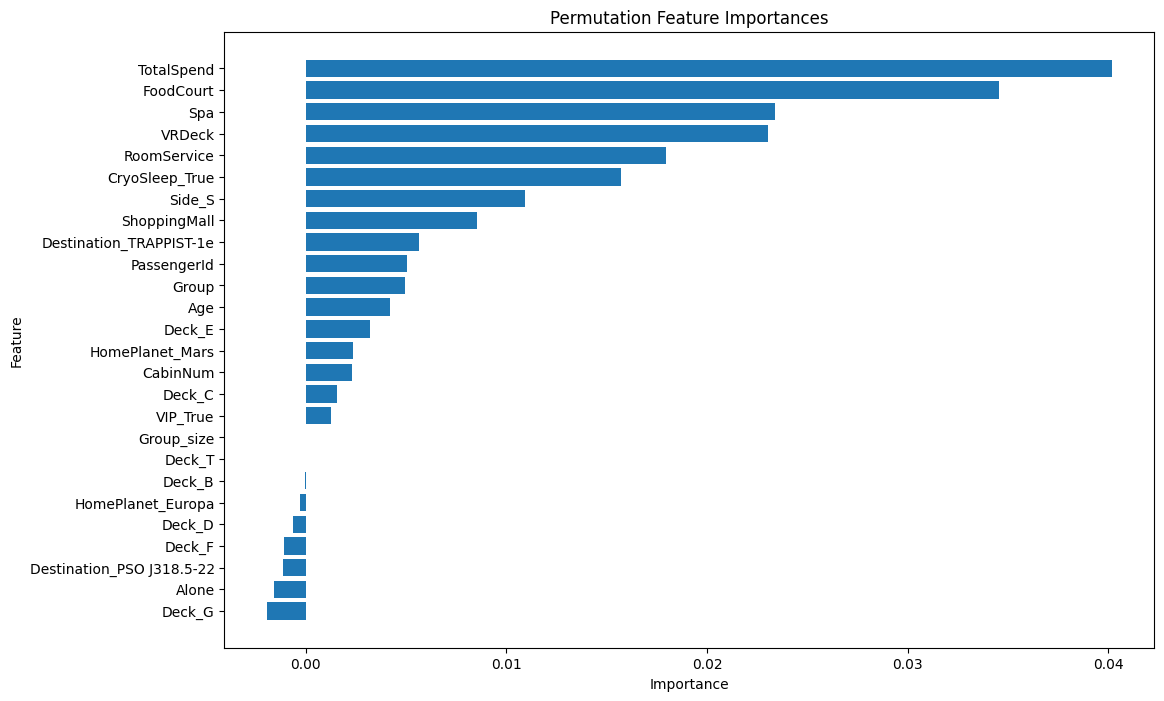

In [ ]:
# Calculate permutation importance
result = permutation_importance(model, X_val_split, y_val_split, n_repeats=10, random_state=42, n_jobs=-1)

# Create a DataFrame for visualization
perm_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=False)

# Plot permutation feature importances
plt.figure(figsize=(12, 8))
plt.barh(perm_importance_df['Feature'], perm_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Permutation Feature Importances')
plt.gca().invert_yaxis()
plt.show()

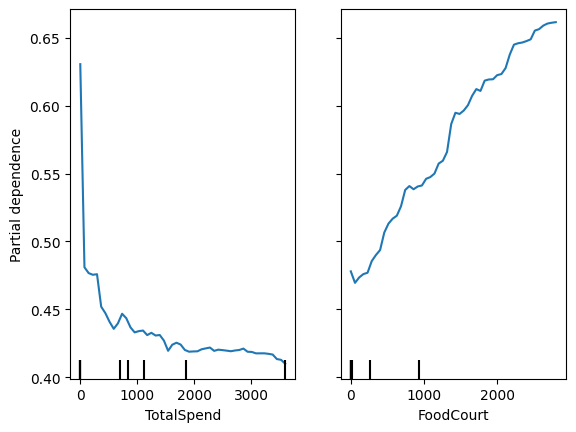

In [ ]:
# Plot partial dependence for the top 2 features
features = perm_importance_df['Feature'][:2].tolist()
display = PartialDependenceDisplay.from_estimator(model, X_val_split, features, grid_resolution=50)
plt.show()

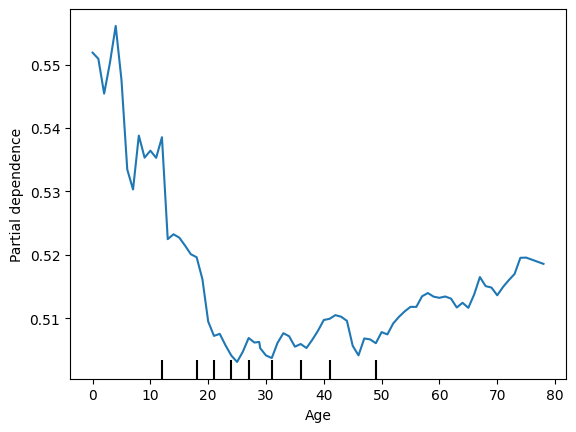

In [ ]:
PartialDependenceDisplay.from_estimator(model, X_val_split, ['Age'])
plt.show()

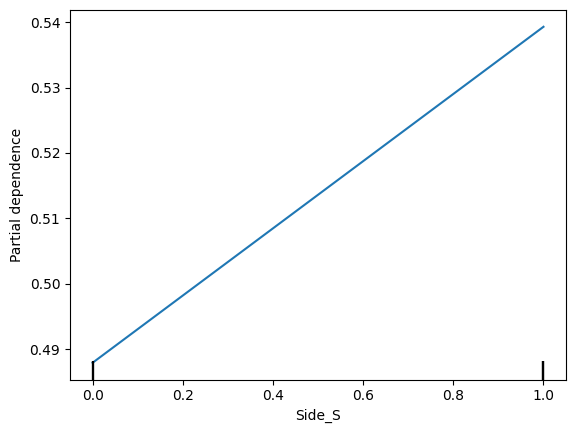

In [ ]:
PartialDependenceDisplay.from_estimator(model, X_val_split, ['Side_S'])
plt.show()